## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [5]:
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


- The minimum value of the BMI is around 12 and maximum is 94.85
- HeartDisease, Smoking, Alcohol Drinking, Stroke, DiffWalking, Sex, PhysicalActivity, Asthma, KidneyDisease, and SkinCancer columns contain the binary categories 'Yes' or 'NO'.
- avg mental health is for 7 days and min is 0 that means mantal health remains good for 30 days
- Race has 6 unique categories
- Most of the data is in Yes or No format

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [6]:
df.isnull().sum()/len(df)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

No Missing Value

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [7]:
count = len(df[df.duplicated()])
print(" There are "+ str(count) +" duplicate rows in data")

 There are 18078 duplicate rows in data


In [8]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(301717, 18)

In [10]:
count = len(df[df.duplicated()])
print(" There are "+ str(count) +" duplicate rows in data")

 There are 0 duplicate rows in data


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

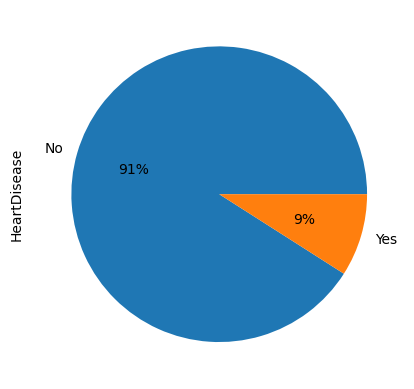

In [11]:
df['HeartDisease'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [12]:
df['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

- Unbalanced distribution
- The Data set is highly imbalanced. This could result in wrong predictions.
- We can do upscaling and downscaling to make it balance one , also check AOC , ROC score

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [13]:
data_categorical = df.select_dtypes(['object']).columns
data_categorical

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [14]:
data_cat=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

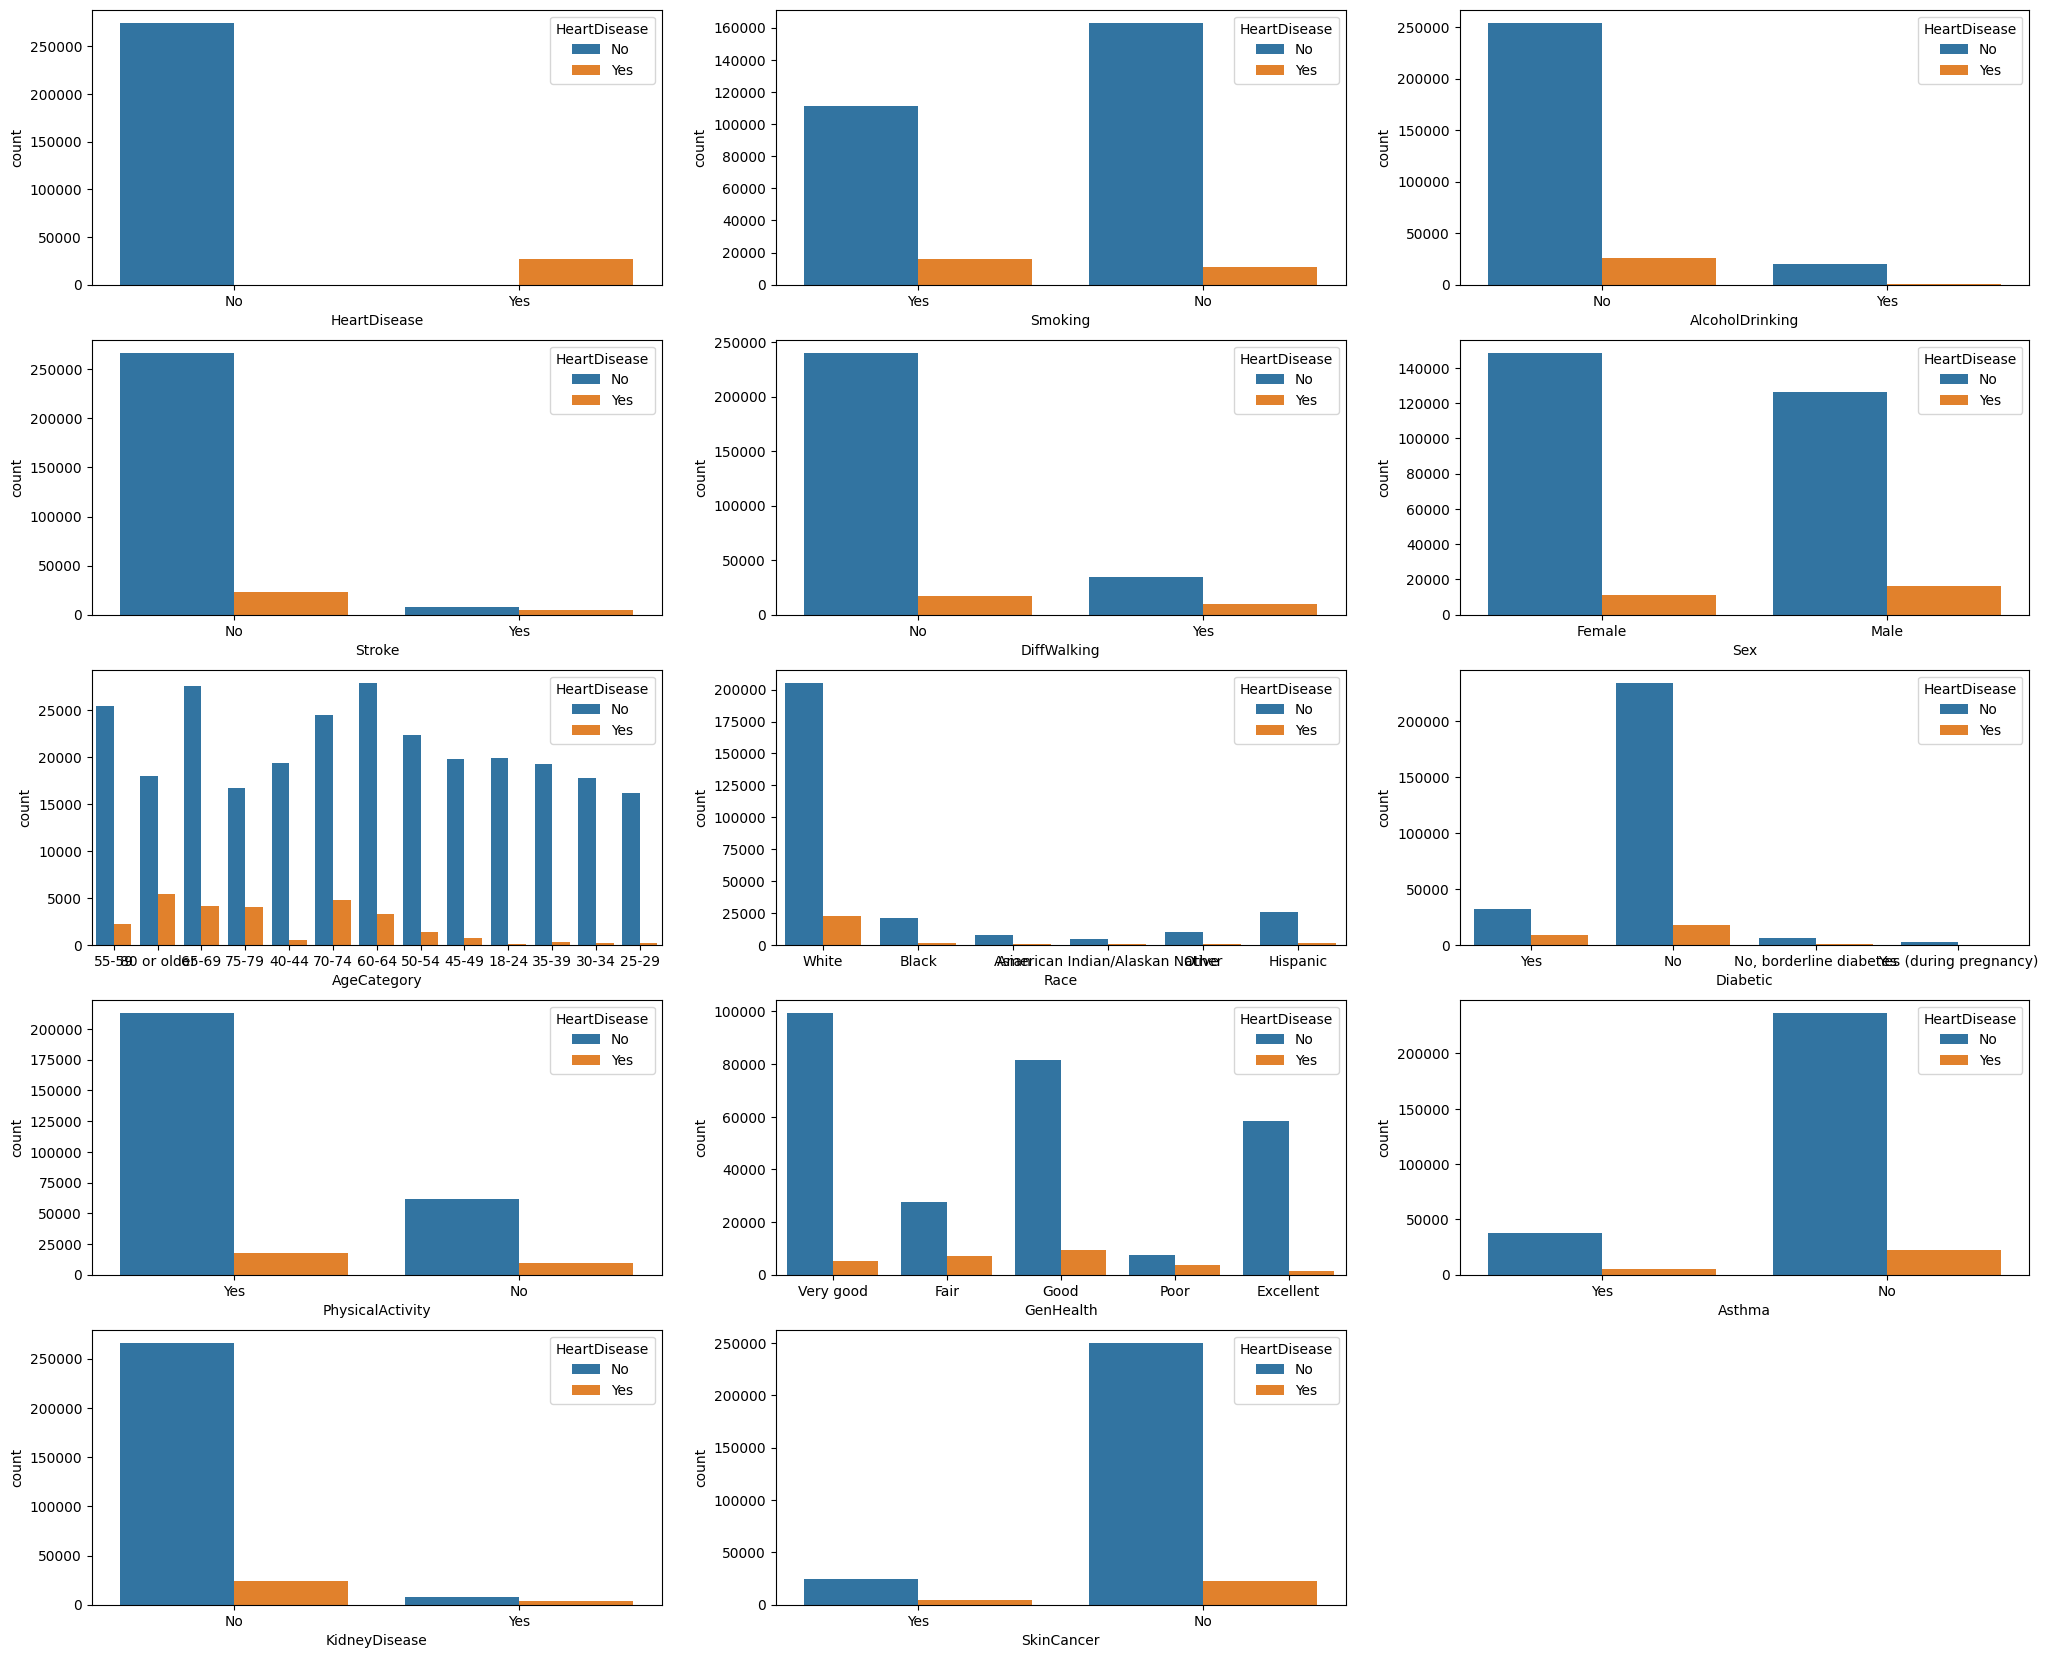

In [15]:
plt.figure(1, figsize = (25,25))
i = 1
for column in data_categorical:
    plt.subplot(6,3,i)
    sns.countplot(data = df, x = column, hue = 'HeartDisease')
    i += 1

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [16]:
#unique categories in column 'Diabetic'
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [17]:
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})

In [18]:
df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [19]:
df['HeartDisease'] = df['HeartDisease'].replace({'Yes':1,'No':0})

In [20]:
df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [21]:
object_type_variables = [i for i in df[['AgeCategory','Race','GenHealth']] if df.dtypes[i] == object]
object_type_variables

['AgeCategory', 'Race', 'GenHealth']

In [22]:
le =LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q=le.fit_transform(df[i].astype(str))
        df[i]=q
        df[i]=df[i].astype(int)
encoder(df)

In [23]:
df=pd.get_dummies(df,drop_first=True)

In [24]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20.0,30.0,9,5,1,8.0,1,0,0,0,1,1,1,1,0,0
3,0,24.21,0.0,0.0,11,5,2,6.0,0,0,0,0,0,0,0,0,0,1
4,0,23.71,28.0,0.0,4,5,4,8.0,0,0,0,1,0,0,1,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [25]:
X = df.drop('HeartDisease', axis = 1)
Y = df['HeartDisease']

In [26]:
X

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,9,5,1,8.0,1,0,0,0,1,1,1,1,0,0
3,24.21,0.0,0.0,11,5,2,6.0,0,0,0,0,0,0,0,0,0,1
4,23.71,28.0,0.0,4,5,4,8.0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,8,3,1,6.0,1,0,0,1,1,1,0,1,0,0
319791,29.84,0.0,0.0,3,3,4,5.0,1,0,0,0,1,0,1,1,0,0
319792,24.24,0.0,0.0,5,3,2,6.0,0,0,0,0,0,0,1,0,0,0
319793,32.81,0.0,0.0,1,3,2,12.0,0,0,0,0,0,0,0,0,0,0


In [27]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int64

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(211201, 17) (90516, 17)
(211201,) (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [29]:
ss = StandardScaler()

X_train.iloc[:,:7]=ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7]=ss.transform(X_test.iloc[:,:7])

In [30]:
X_train

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
156853,-0.235338,-0.438978,-0.505559,0.693814,0.515456,1.176744,-0.058839,1,0,0,0,1,0,1,0,0,1
299329,-0.598772,0.544948,1.963475,-0.421469,-1.098982,-0.146171,-0.058839,0,0,0,0,0,0,1,0,0,0
108809,-0.846216,-0.070005,-0.505559,0.414993,0.515456,-1.469087,-0.058839,0,0,0,0,1,0,1,0,0,0
49525,-1.692165,-0.438978,-0.505559,-1.257931,0.515456,-1.469087,0.622306,1,0,0,0,0,0,1,0,0,0
315760,1.481304,-0.438978,3.197992,-0.142648,-1.098982,-0.807629,-3.464561,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279090,-0.335863,-0.438978,-0.135204,0.136173,0.515456,-0.146171,0.622306,0,0,0,0,0,0,1,0,0,0
7844,-1.072008,-0.438978,-0.505559,0.136173,0.515456,-0.146171,0.622306,1,0,0,0,1,0,0,0,0,0
166779,0.485342,-0.438978,-0.135204,0.693814,0.515456,-0.146171,0.622306,0,0,0,0,1,0,0,0,1,0
113853,-0.306479,-0.438978,0.728958,0.414993,0.515456,-0.146171,-0.739983,0,0,0,0,1,0,1,0,0,0


In [31]:
X_test

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
254285,0.398737,0.175976,-0.505559,-1.257931,0.515456,-1.469087,-0.058839,0,0,0,0,1,0,1,0,0,0
232029,0.217793,2.020837,-0.258655,0.693814,0.515456,-0.807629,0.622306,1,0,0,0,1,0,1,0,0,0
62601,0.397190,-0.438978,-0.505559,0.414993,-2.713420,-0.807629,-0.739983,0,0,0,1,1,1,0,0,0,0
186375,1.739574,-0.438978,1.346217,0.972635,0.515456,-0.807629,-0.058839,0,0,0,1,0,1,0,0,0,0
212252,0.024478,-0.438978,-0.258655,0.693814,0.515456,1.176744,0.622306,1,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67250,-0.680738,-0.438978,-0.505559,-0.700290,-2.713420,1.176744,-1.421128,1,0,0,0,0,0,1,0,0,0
163768,0.384818,-0.438978,-0.505559,-1.536752,0.515456,1.176744,-0.739983,1,0,0,0,1,0,1,0,0,0
139860,0.646181,-0.438978,-0.505559,-0.142648,0.515456,1.176744,-0.058839,0,0,0,1,1,0,0,0,0,0
66986,-0.451852,-0.438978,-0.505559,-1.815573,-2.713420,1.176744,0.622306,0,0,0,0,0,0,1,0,0,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [32]:
## defining a function for returning the accuracy score for a model and its data-inputs

def fit_predict_print(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)                                   # fit the model using training data
    prediction = model.predict(X_test)                            # make predictions for the model using test data
    accuracy = accuracy_score(Y_test, prediction)                 # compute accuracy
    return accuracy                                               # retrun accuracy metric

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [33]:
## declaring different training methods

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators =[('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc=StackingClassifier(estimators=estimators,final_estimator=rf)

In [ ]:
result = pd.DataFrame(columns=['Accuracy'])

for model, model_name in zip([lr, nb ,knn ,dt ,rf ,adb ,gb ,sc ],
                            ['Logistic Regression','Naive Bayes','KNN','Decision tree',
                            'Random Forest','Ada Boost','Gradient Boost','Stacking']):
    result.loc[model_name]=fit_predict_print(model,X_train,X_test,Y_train,Y_test)

In [ ]:
result

### Conclusion

From EDA:

People who smoke have higher chance of heart disease then no smokers
Male are more prone to suffer from heart disease as compare to females
People with age limit in between 55-75 has higer chances of getting heart disease
If people has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease
There are higher chances of a person having heart disease if he does not have any kidney disease.

From Model:

We see that the best perfomrming models are gradient boost,adaboost,logistic regression and knn with around 91% accuracy.
Please note that the target class is highly imbalanced so, accutracy does not hold good for imbalanced data.Accuracy becomes poor measure of evaluation for our classification model in the context.
We can future go with evaluatin the modles based on the different perfomance metrics such as presicion ,recall and F1score and choose the model accordingly

----
## Happy Learning:)
----